# Exploratory Data Analysis (EDA)

## Overview
This notebook performs comprehensive data analysis and visualization.

## Responsibilities
- Load processed data from `data/processed/`
- Analyze feature distributions
- Create correlation heatmaps
- Visualize class balance
- Identify important patterns and insights
- Generate charts: histograms, box plots, scatter plots

## Required Files
- `data/processed/X_train.csv`
- `data/processed/y_train.csv`

## Status
⏳ **Done** - [Mohamed Osama Abderlrazek Hazza]
    
---

*TODO: Add EDA Markdowns and Codes in this Notebook*

# Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import chi2_contingency
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.4f}'.format)

print(" All libraries imported successfully!")


 All libraries imported successfully!


# Load Processed Data

In [4]:
X_train = pd.read_csv('../data/processed/X_train.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
df_train = pd.concat([X_train, y_train], axis=1)

print(f" Data loaded successfully!")
print(f"Training set shape: {df_train.shape}")
print(f"Features: {X_train.shape[1]}")
print(f"Samples: {len(df_train)}")


 Data loaded successfully!
Training set shape: (183824, 22)
Features: 21
Samples: 183824


# data set Overview

In [5]:
print("=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)

print("\n First 5 rows:")
display(df_train.head())

print("\n Dataset Info:")
print(df_train.info())

print("\n Dataset Shape:")
print(f"Rows: {df_train.shape[0]:,}")
print(f"Columns: {df_train.shape[1]}")

print("\n Column Names:")
print(df_train.columns.tolist())

DATASET OVERVIEW

 First 5 rows:


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012
0,-0.9127,-0.8896,0.2054,-0.5431,-0.9335,-0.2165,-0.3393,-1.6584,0.7946,0.5081,-0.2542,0.2387,-0.3199,-0.5646,1.4902,-0.5168,-0.4772,-0.8850,0.6185,0.0196,-0.4255,0.0000
1,-0.9127,-0.8896,0.2054,-1.1325,-0.9335,-0.2165,-0.3393,-1.6584,0.7946,0.5081,-0.2542,0.2387,-0.3199,-0.5646,-0.4544,-0.4063,-0.4772,-0.8850,-1.3209,1.0267,0.5303,0.0000
2,1.0957,-0.8896,0.2054,0.4884,-0.9335,-0.2165,-0.3393,0.6030,0.7946,0.5081,-0.2542,0.2387,-0.3199,0.3746,-0.4544,-0.5168,-0.4772,1.1299,-1.6441,1.0267,1.0082,0.0000
3,1.0957,1.1241,0.2054,0.4884,1.0712,-0.2165,-0.3393,-1.6584,0.7946,0.5081,-0.2542,0.2387,-0.3199,0.3746,-0.4544,-0.5168,-0.4772,-0.8850,1.2649,0.0196,0.0524,2.0000
4,1.0957,-0.8896,0.2054,-0.5431,1.0712,-0.2165,2.9476,-1.6584,0.7946,0.5081,-0.2542,0.2387,-0.3199,1.3139,3.4347,2.7994,2.0954,1.1299,1.5881,-0.9876,-2.3371,0.0000



 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183824 entries, 0 to 183823
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                183824 non-null  float64
 1   HighChol              183824 non-null  float64
 2   CholCheck             183824 non-null  float64
 3   BMI                   183824 non-null  float64
 4   Smoker                183824 non-null  float64
 5   Stroke                183824 non-null  float64
 6   HeartDiseaseorAttack  183824 non-null  float64
 7   PhysActivity          183824 non-null  float64
 8   Fruits                183824 non-null  float64
 9   Veggies               183824 non-null  float64
 10  HvyAlcoholConsump     183824 non-null  float64
 11  AnyHealthcare         183824 non-null  float64
 12  NoDocbcCost           183824 non-null  float64
 13  GenHlth               183824 non-null  float64
 14  MentHlth              183824 non-nul

# Statistical Summary

In [6]:
print("=" * 80)
print("STATISTICAL SUMMARY")
print("=" * 80)


print("\n Descriptive Statistics:")
display(df_train.describe().T)


print("\n Data Types Distribution:")
print(df_train.dtypes.value_counts())

print("\n Missing Values:")
missing = df_train.isnull().sum()
if missing.sum() == 0:
    print(" No missing values detected!")
else:
    print(missing[missing > 0])

STATISTICAL SUMMARY

 Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
HighBP,183824.0000,0.0021,1.0002,-0.9127,-0.9127,-0.9127,1.0957,1.0957
HighChol,183824.0000,0.0013,1.0002,-0.8896,-0.8896,-0.8896,1.1241,1.1241
CholCheck,183824.0000,0.0023,0.9946,-4.8696,0.2054,0.2054,0.2054,0.2054
BMI,183824.0000,0.0005,0.9979,-2.4587,-0.6905,-0.2484,0.4884,10.2138
Smoker,183824.0000,0.0021,1.0001,-0.9335,-0.9335,-0.9335,1.0712,1.0712
Stroke,183824.0000,-0.0014,0.9970,-0.2165,-0.2165,-0.2165,-0.2165,4.6199
HeartDiseaseorAttack,183824.0000,0.0005,1.0007,-0.3393,-0.3393,-0.3393,-0.3393,2.9476
PhysActivity,183824.0000,-0.0007,1.0004,-1.6584,-1.6584,0.6030,0.6030,0.6030
Fruits,183824.0000,-0.0000,1.0000,-1.2585,-1.2585,0.7946,0.7946,0.7946
Veggies,183824.0000,0.0004,0.9997,-1.9681,0.5081,0.5081,0.5081,0.5081



 Data Types Distribution:
float64    22
Name: count, dtype: int64

 Missing Values:
 No missing values detected!


# Target Variable Analysis

TARGET VARIABLE ANALYSIS

 Target Variable: Diabetes_012

Class Distribution:
  Class 0.0: 152,043 samples (82.71%)
  Class 1.0: 3,703 samples (2.01%)
  Class 2.0: 28,078 samples (15.27%)


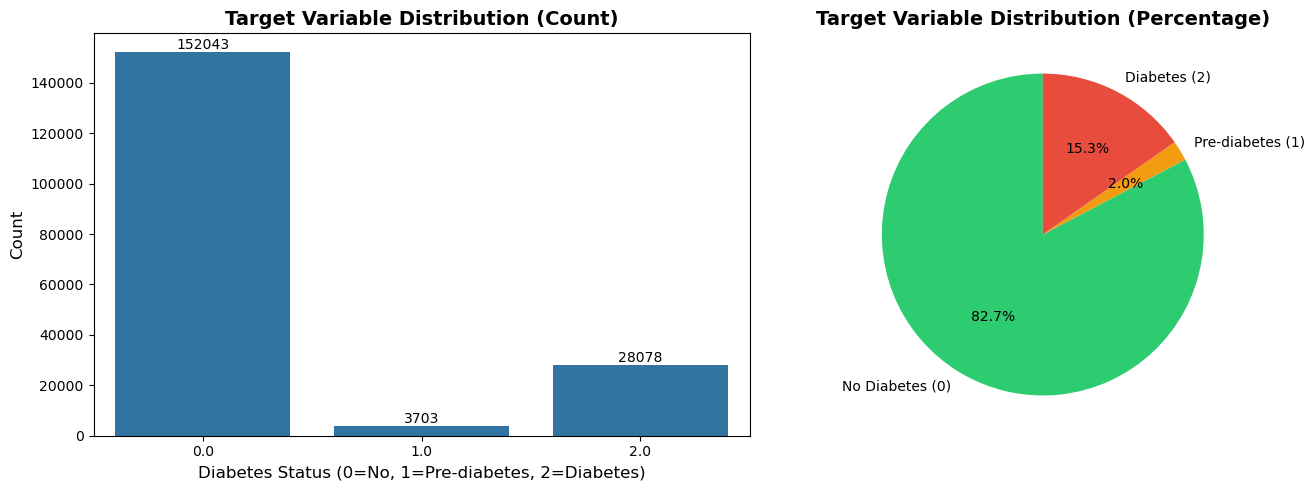


 Class Balance Ratio: 41.06:1
 Dataset is IMBALANCED - Consider using SMOTE or class weights

 Multi-class Classification Detected (3 classes)
 Consider using:
   - One-vs-Rest or One-vs-One strategies
   - Multi-class metrics (macro/micro F1-score)
   - Confusion matrix for detailed analysis


In [8]:
print("=" * 80)
print("TARGET VARIABLE ANALYSIS")
print("=" * 80)

# Target distribution
target_col = 'Diabetes_binary' if 'Diabetes_binary' in df_train.columns else y_train.columns[0]
target_counts = df_train[target_col].value_counts().sort_index()
target_percent = df_train[target_col].value_counts(normalize=True).sort_index() * 100

print(f"\n Target Variable: {target_col}")
print(f"\nClass Distribution:")
for cls, count in target_counts.items():
    print(f"  Class {cls}: {count:,} samples ({target_percent[cls]:.2f}%)")

# Determine number of classes and create appropriate labels
n_classes = len(target_counts)
unique_classes = sorted(target_counts.index.tolist())

# Create dynamic labels based on number of classes
if n_classes == 2:
    pie_labels = ['No Diabetes (0)', 'Diabetes (1)']
    colors = ['#2ecc71', '#e74c3c']
    xlabel_text = 'Diabetes Status (0=No, 1=Yes)'
elif n_classes == 3:
    pie_labels = ['No Diabetes (0)', 'Pre-diabetes (1)', 'Diabetes (2)']
    colors = ['#2ecc71', '#f39c12', '#e74c3c']
    xlabel_text = 'Diabetes Status (0=No, 1=Pre-diabetes, 2=Diabetes)'
else:
    pie_labels = [f'Class {cls}' for cls in unique_classes]
    colors = plt.cm.Set3(range(n_classes))
    xlabel_text = 'Class'

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df_train, x=target_col, ax=axes[0], order=unique_classes)
axes[0].set_title('Target Variable Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel(xlabel_text, fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d')

# Pie chart
axes[1].pie(target_counts.values, labels=pie_labels, 
            autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Target Variable Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Class balance
ratio = target_counts.max() / target_counts.min()
print(f"\n Class Balance Ratio: {ratio:.2f}:1")
if ratio > 3:
    print(" Dataset is IMBALANCED - Consider using SMOTE or class weights")
else:
    print(" Dataset is relatively BALANCED")

# Additional info for multi-class
if n_classes > 2:
    print(f"\n Multi-class Classification Detected ({n_classes} classes)")
    print(" Consider using:")
    print("   - One-vs-Rest or One-vs-One strategies")
    print("   - Multi-class metrics (macro/micro F1-score)")
    print("   - Confusion matrix for detailed analysis")



# Feature Distribution Analysis - Numerical Features

NUMERICAL FEATURES DISTRIBUTION

 Numerical Features: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


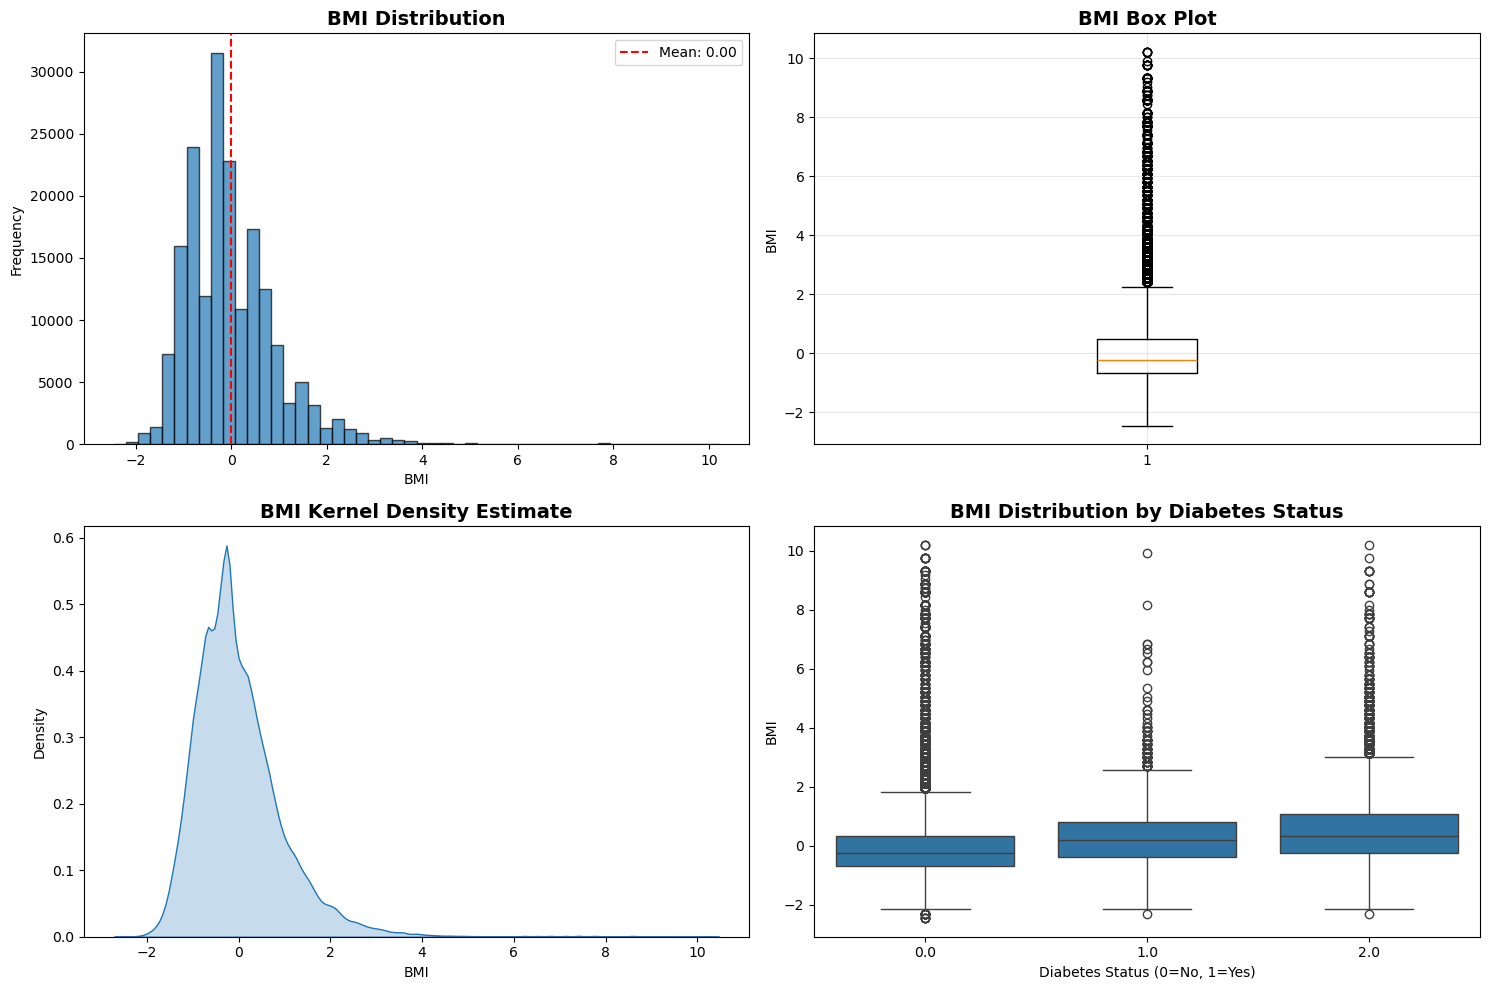


 BMI Statistics by Diabetes Status:
                   count    mean    std     min     25%     50%    75%     max
Diabetes_012                                                                  
0.0000       152043.0000 -0.0951 0.9538 -2.4587 -0.6905 -0.2484 0.3410 10.2138
1.0000         3703.0000  0.2971 1.0119 -2.3114 -0.3957  0.1937 0.7831  9.9191
2.0000        28078.0000  0.4791 1.0811 -2.3114 -0.2484  0.3410 1.0778 10.2138


In [9]:
print("=" * 80)
print("NUMERICAL FEATURES DISTRIBUTION")
print("=" * 80)

# Identify numerical features (assuming BMI is the only continuous variable)
numerical_features = X_train.select_dtypes(include=[np.number]).columns.tolist()

print(f"\n Numerical Features: {numerical_features}")

# BMI distribution (most important numerical feature)
if 'BMI' in numerical_features:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Histogram
    axes[0, 0].hist(df_train['BMI'], bins=50, edgecolor='black', alpha=0.7)
    axes[0, 0].set_title('BMI Distribution', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('BMI')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].axvline(df_train['BMI'].mean(), color='red', linestyle='--', label=f'Mean: {df_train["BMI"].mean():.2f}')
    axes[0, 0].legend()
    
    # Box plot
    axes[0, 1].boxplot(df_train['BMI'], vert=True)
    axes[0, 1].set_title('BMI Box Plot', fontsize=14, fontweight='bold')
    axes[0, 1].set_ylabel('BMI')
    axes[0, 1].grid(True, alpha=0.3)
    
    # KDE plot
    sns.kdeplot(data=df_train, x='BMI', ax=axes[1, 0], fill=True)
    axes[1, 0].set_title('BMI Kernel Density Estimate', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('BMI')
    axes[1, 0].set_ylabel('Density')
    
    # BMI by Diabetes Status
    sns.boxplot(data=df_train, x=target_col, y='BMI', ax=axes[1, 1])
    axes[1, 1].set_title('BMI Distribution by Diabetes Status', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Diabetes Status (0=No, 1=Yes)')
    axes[1, 1].set_ylabel('BMI')
    
    plt.tight_layout()
    plt.show()
    
    # BMI statistics by class
    print("\n BMI Statistics by Diabetes Status:")
    print(df_train.groupby(target_col)['BMI'].describe())



# Feature Distribution Analysis - Categorical Features

CATEGORICAL FEATURES DISTRIBUTION

 Total Categorical Features: 20
Features: ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump']...


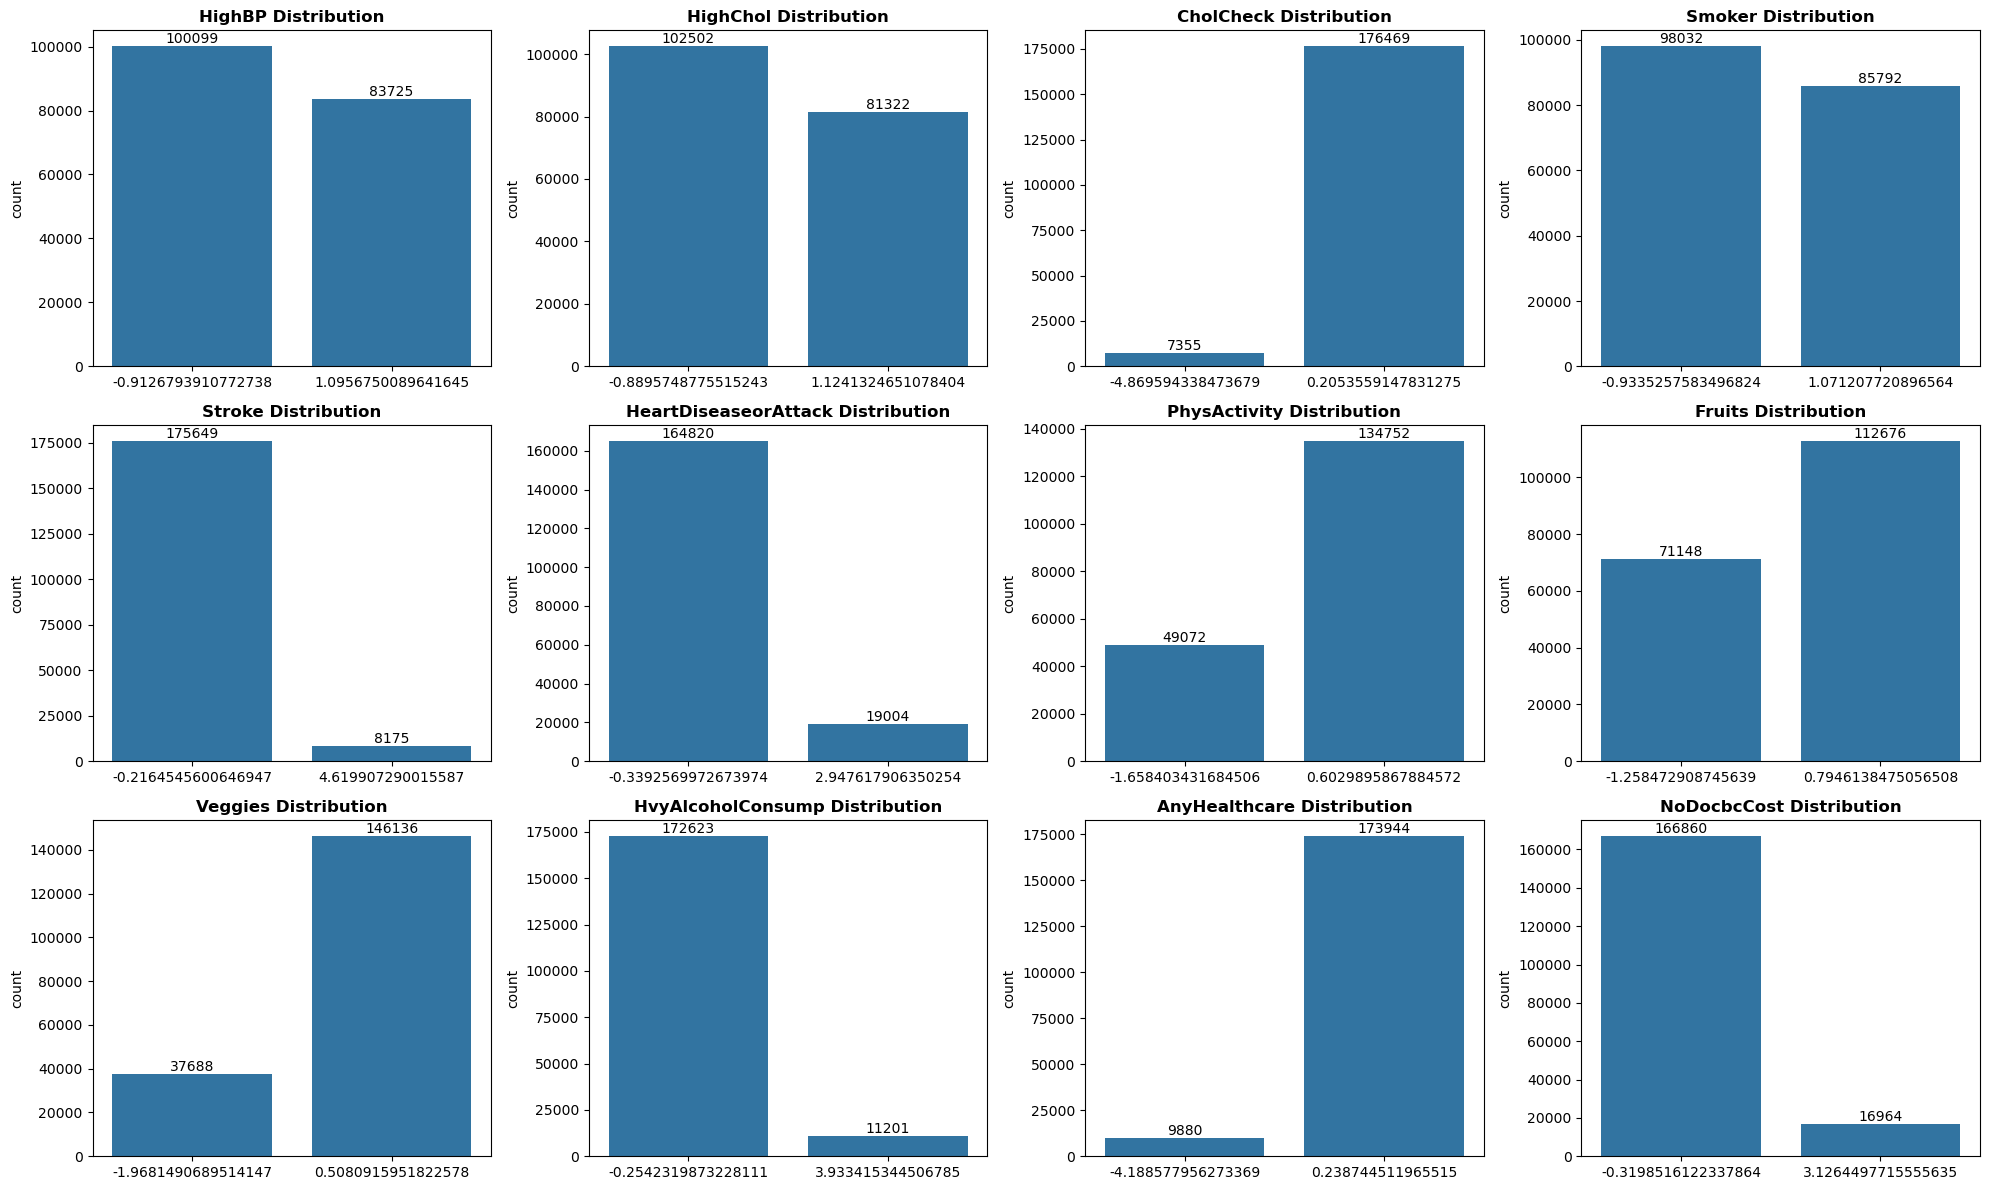

In [10]:
print("=" * 80)
print("CATEGORICAL FEATURES DISTRIBUTION")
print("=" * 80)

# Get categorical features (excluding target)
categorical_features = [col for col in X_train.columns if col != target_col and col != 'BMI']

print(f"\n Total Categorical Features: {len(categorical_features)}")
print(f"Features: {categorical_features[:10]}...")  # Show first 10

# Plot distributions for key categorical features
key_features = [
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 
    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost'
]

# Filter to only features that exist in the dataset
key_features = [f for f in key_features if f in categorical_features]

# Create subplots
n_features = len(key_features)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    # Count plot
    sns.countplot(data=df_train, x=feature, ax=axes[idx])
    axes[idx].set_title(f'{feature} Distribution', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('')
    
    # Add value labels
    for container in axes[idx].containers:
        axes[idx].bar_label(container, fmt='%d')

# Hide unused subplots
for idx in range(len(key_features), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# Correlation Analysis - Heatmap

CORRELATION ANALYSIS


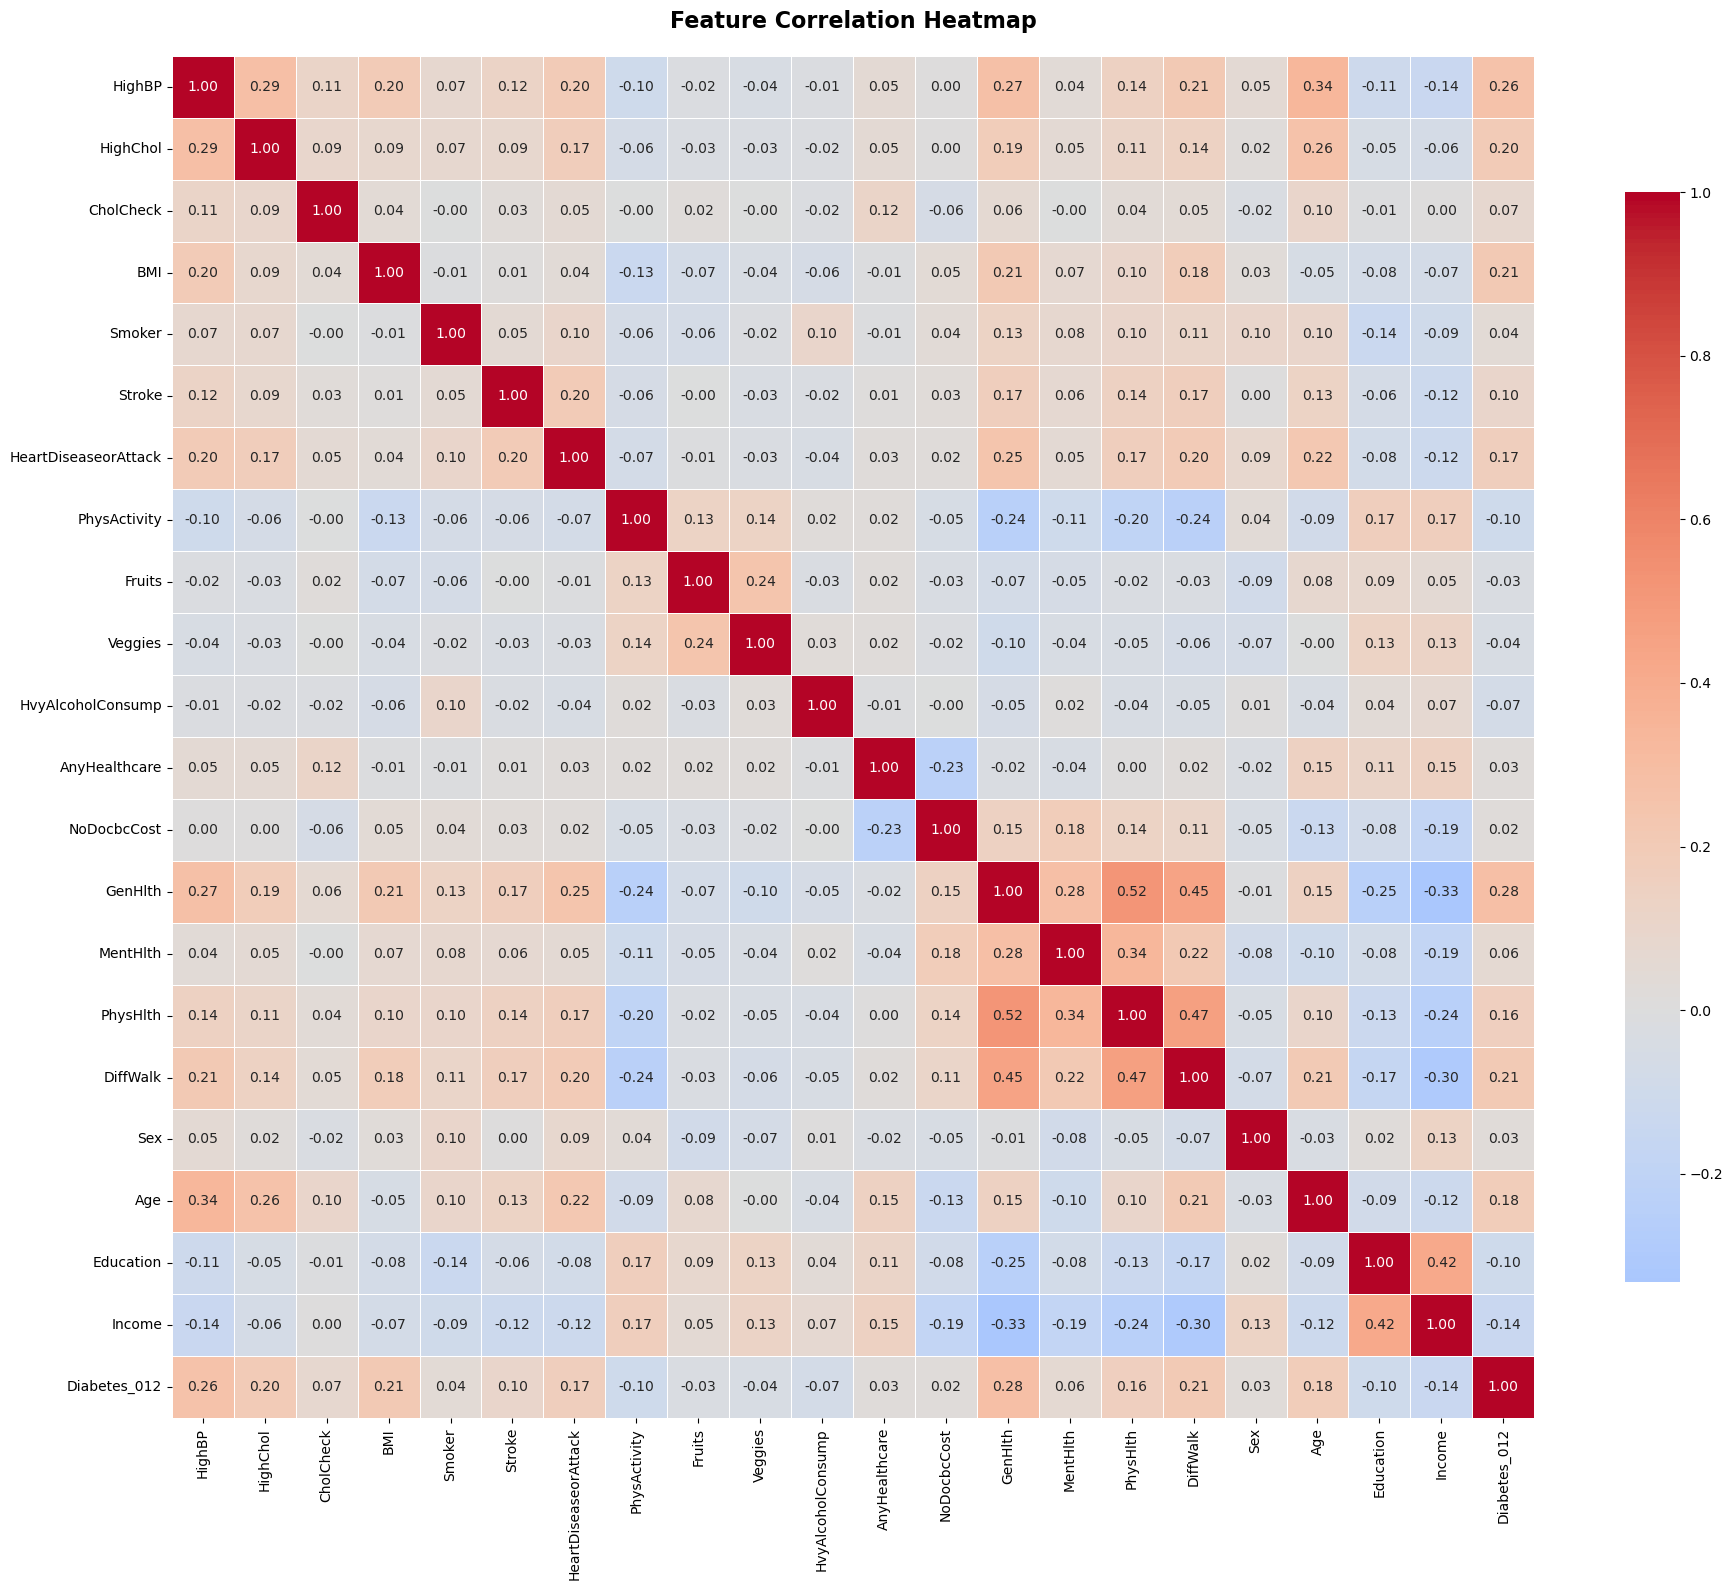


🎯 Correlation with Target Variable (Diabetes_binary):
Diabetes_012            1.0000
GenHlth                 0.2831
HighBP                  0.2608
BMI                     0.2105
DiffWalk                0.2083
HighChol                0.2023
Age                     0.1838
HeartDiseaseorAttack    0.1690
PhysHlth                0.1592
Stroke                  0.0995
CholCheck               0.0748
MentHlth                0.0590
Smoker                  0.0445
Sex                     0.0319
AnyHealthcare           0.0263
NoDocbcCost             0.0223
Fruits                 -0.0253
Veggies                -0.0430
HvyAlcoholConsump      -0.0675
PhysActivity           -0.1031
Education              -0.1046
Income                 -0.1443
Name: Diabetes_012, dtype: float64


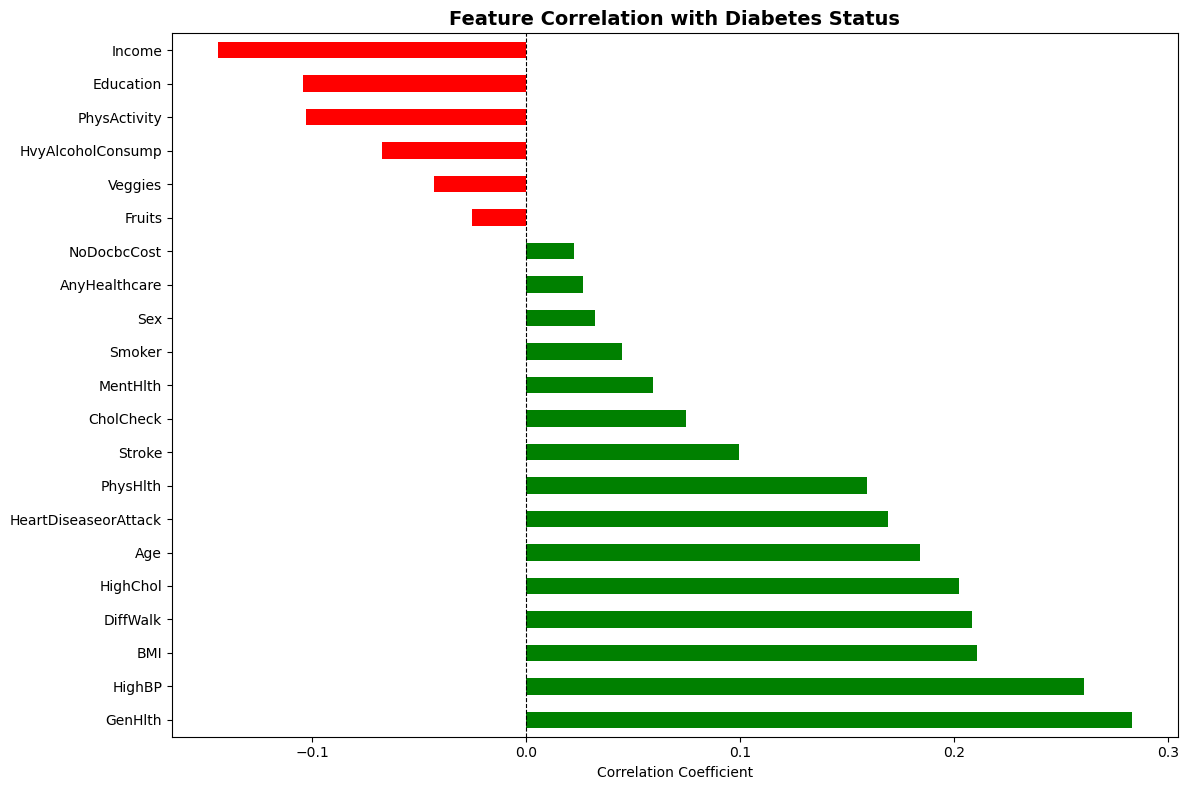


 Top 10 Positively Correlated Features:
GenHlth                0.2831
HighBP                 0.2608
BMI                    0.2105
DiffWalk               0.2083
HighChol               0.2023
Age                    0.1838
HeartDiseaseorAttack   0.1690
PhysHlth               0.1592
Stroke                 0.0995
CholCheck              0.0748
Name: Diabetes_012, dtype: float64

 Top 10 Negatively Correlated Features:
Smoker               0.0445
Sex                  0.0319
AnyHealthcare        0.0263
NoDocbcCost          0.0223
Fruits              -0.0253
Veggies             -0.0430
HvyAlcoholConsump   -0.0675
PhysActivity        -0.1031
Education           -0.1046
Income              -0.1443
Name: Diabetes_012, dtype: float64


In [11]:
print("=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

# Calculate correlation matrix
correlation_matrix = df_train.corr()

# Full correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Correlation with target variable
print("\n🎯 Correlation with Target Variable (Diabetes_binary):")
target_corr = correlation_matrix[target_col].sort_values(ascending=False)
print(target_corr)

# Visualize top correlations with target
plt.figure(figsize=(12, 8))
target_corr_filtered = target_corr[target_corr.index != target_col]
colors = ['green' if x > 0 else 'red' for x in target_corr_filtered.values]
target_corr_filtered.plot(kind='barh', color=colors)
plt.title('Feature Correlation with Diabetes Status', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

print(f"\n Top 10 Positively Correlated Features:")
print(target_corr_filtered.head(10))

print(f"\n Top 10 Negatively Correlated Features:")
print(target_corr_filtered.tail(10))

# Feature Relationships with Target - Grouped Analysis

FEATURE RELATIONSHIPS WITH TARGET


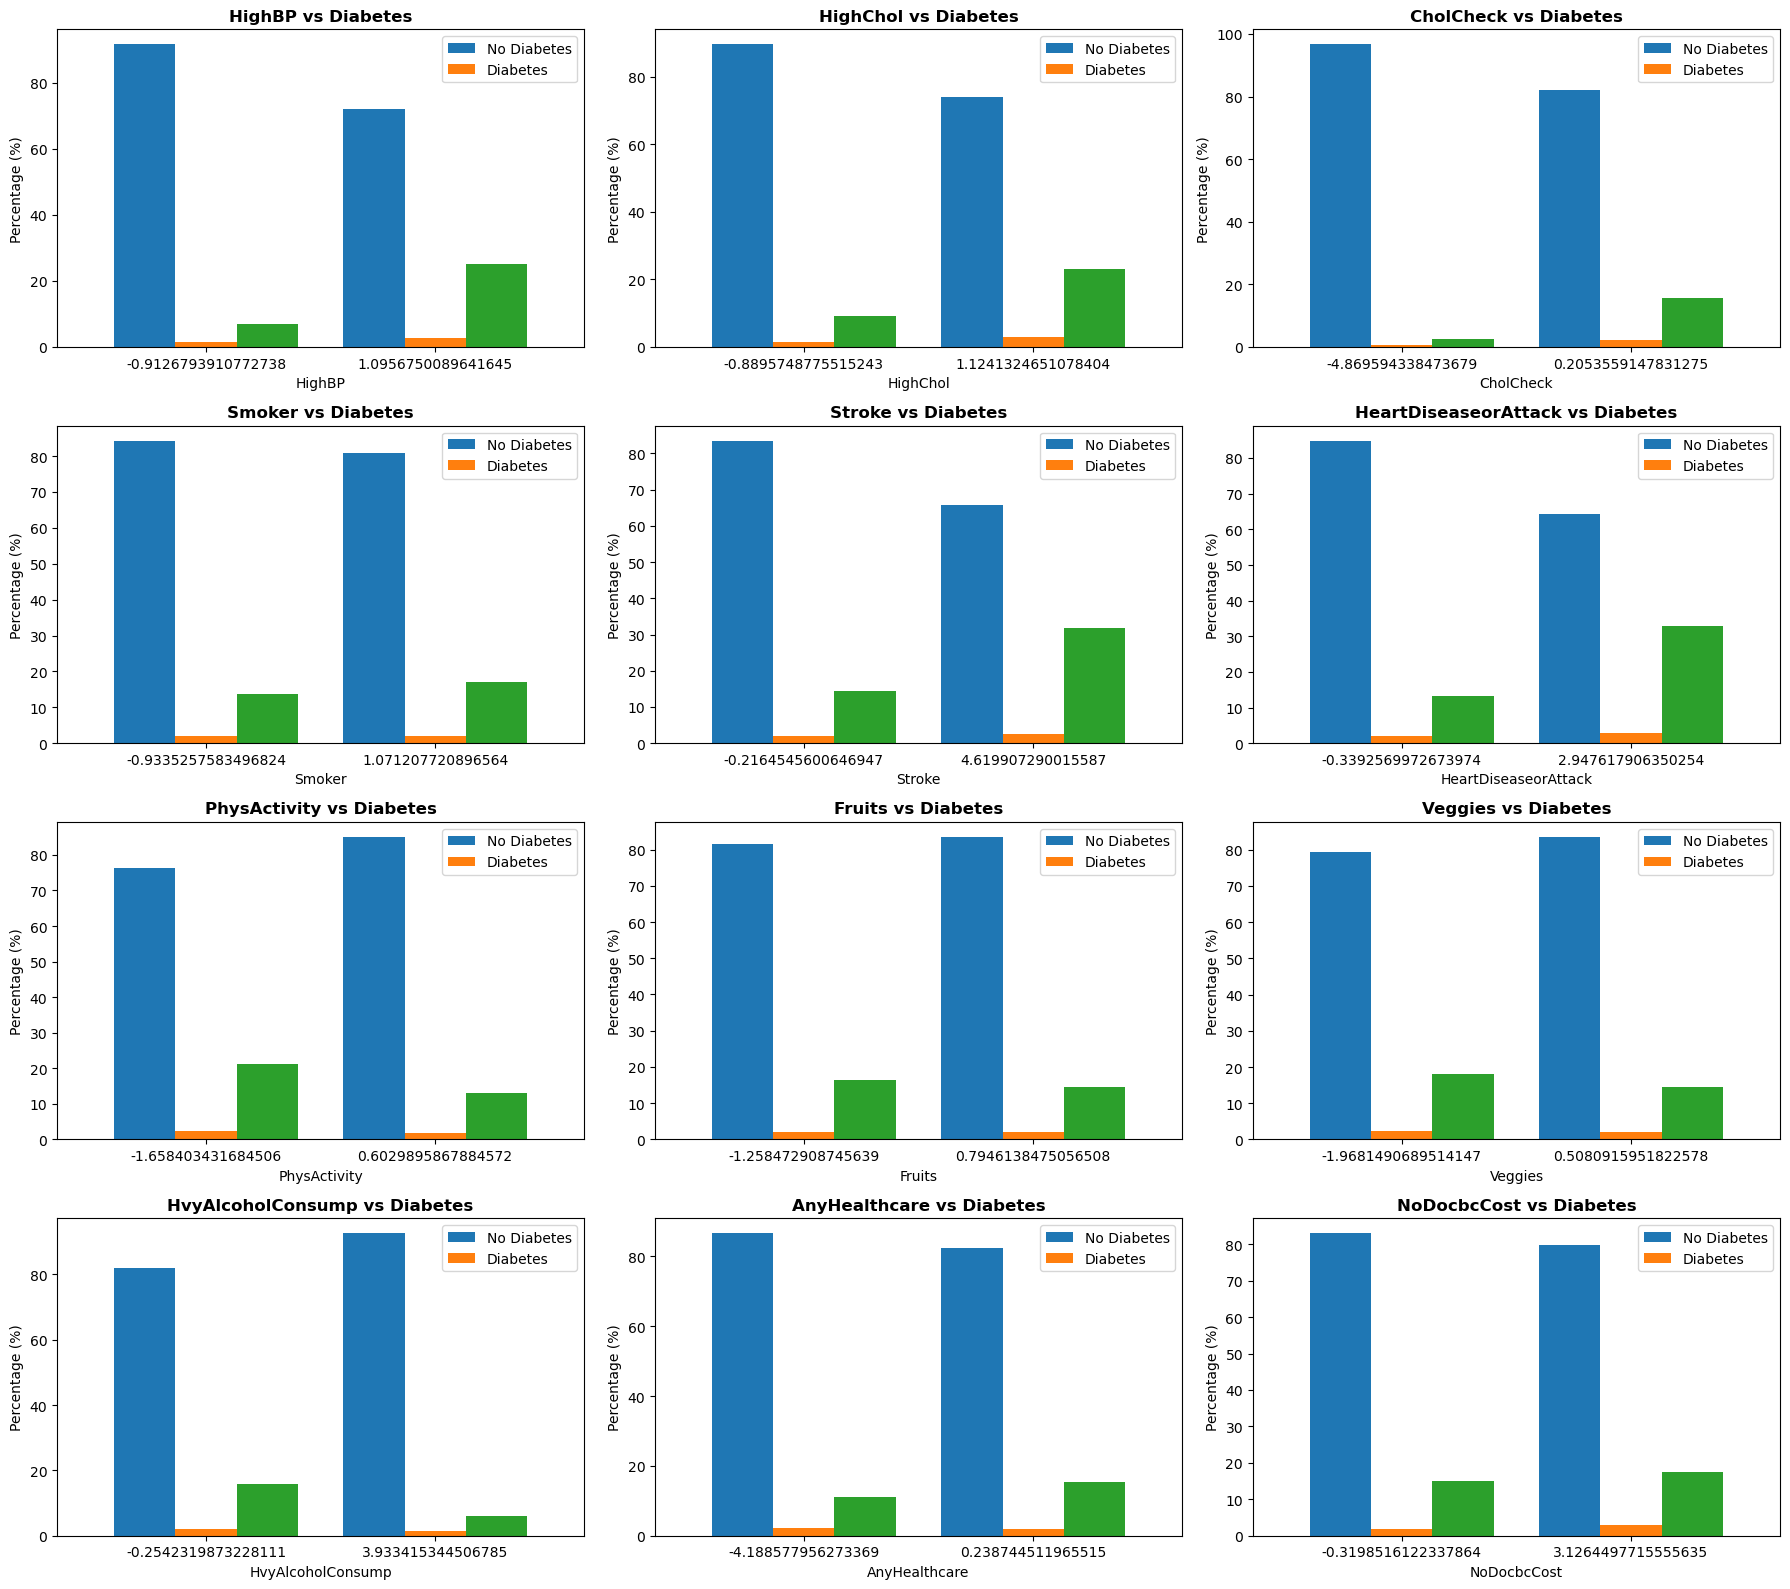

In [12]:

print("=" * 80)
print("FEATURE RELATIONSHIPS WITH TARGET")
print("=" * 80)

# Select key features for detailed analysis
analysis_features = [f for f in key_features if f in df_train.columns][:12]

# Create grouped bar plots
n_features = len(analysis_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for idx, feature in enumerate(analysis_features):
    # Grouped count plot
    cross_tab = pd.crosstab(df_train[feature], df_train[target_col], normalize='index') * 100
    cross_tab.plot(kind='bar', ax=axes[idx], width=0.8)
    axes[idx].set_title(f'{feature} vs Diabetes', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Percentage (%)')
    axes[idx].legend(['No Diabetes', 'Diabetes'], loc='best')
    axes[idx].tick_params(axis='x', rotation=0)

# Hide unused subplots
for idx in range(len(analysis_features), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()



# Chi-Square Test for Categorical Features

CHI-SQUARE TEST FOR FEATURE SIGNIFICANCE

 Chi-Square Test Results (sorted by significance):
                 Feature  Chi2_Statistic  P_Value  Degrees_of_Freedom  \
0                 HighBP      12547.1971   0.0000                   2   
1               HighChol       7626.8983   0.0000                   2   
5   HeartDiseaseorAttack       5256.6992   0.0000                   2   
4                 Stroke       1823.2151   0.0000                   2   
6           PhysActivity       1959.6381   0.0000                   2   
12               GenHlth      15278.2311   0.0000                   8   
15              DiffWalk       7982.4980   0.0000                   2   
14              PhysHlth       5086.5999   0.0000                  60   
18             Education       2155.4717   0.0000                  10   
19                Income       3971.2332   0.0000                  14   
17                   Age       7164.6506   0.0000                  24   
2              CholCheck       

C:\Anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


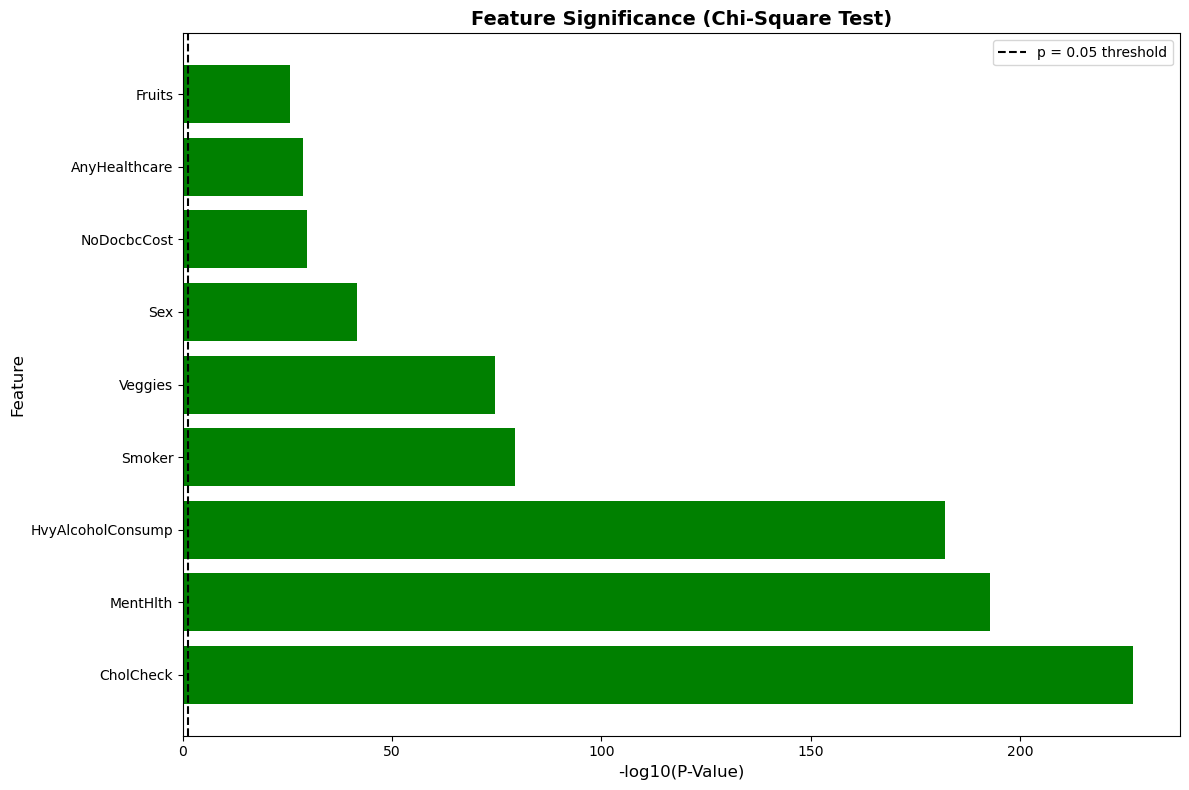

In [13]:
print("=" * 80)
print("CHI-SQUARE TEST FOR FEATURE SIGNIFICANCE")
print("=" * 80)

# Perform Chi-Square test for all categorical features
chi_square_results = []

for feature in categorical_features:
    # Create contingency table
    contingency_table = pd.crosstab(df_train[feature], df_train[target_col])
    
    # Perform Chi-Square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    chi_square_results.append({
        'Feature': feature,
        'Chi2_Statistic': chi2,
        'P_Value': p_value,
        'Degrees_of_Freedom': dof,
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    })

# Create DataFrame and sort by p-value
chi_square_df = pd.DataFrame(chi_square_results).sort_values('P_Value')

print("\n Chi-Square Test Results (sorted by significance):")
print(chi_square_df.head(20))

# Count significant features
significant_count = (chi_square_df['P_Value'] < 0.05).sum()
print(f"\n Significant Features (p < 0.05): {significant_count} out of {len(categorical_features)}")

# Visualize significance
plt.figure(figsize=(12, 8))
colors_sig = ['green' if p < 0.05 else 'red' for p in chi_square_df['P_Value'].head(20)]
plt.barh(chi_square_df['Feature'].head(20), -np.log10(chi_square_df['P_Value'].head(20)), color=colors_sig)
plt.xlabel('-log10(P-Value)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Significance (Chi-Square Test)', fontsize=14, fontweight='bold')
plt.axvline(x=-np.log10(0.05), color='black', linestyle='--', label='p = 0.05 threshold')
plt.legend()
plt.tight_layout()
plt.show()

# Age and Health Indicators Analysis

AGE AND HEALTH INDICATORS ANALYSIS


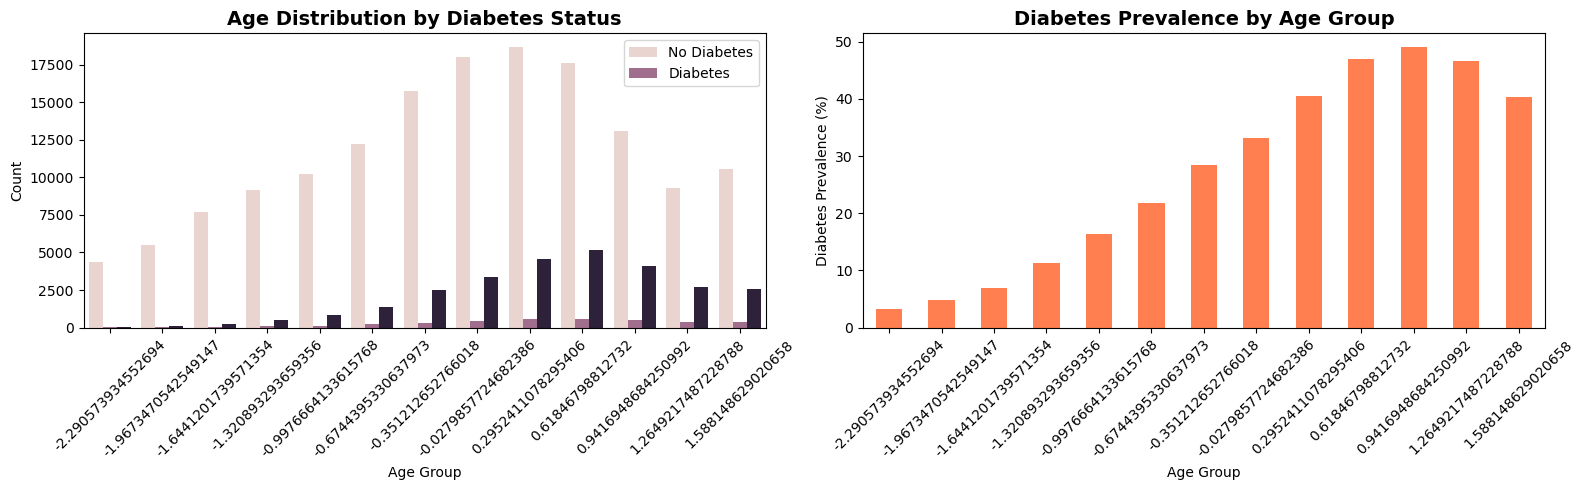


 Diabetes Prevalence by Age Group:
Age
-2.2906    3.3101
-1.9673    4.8084
-1.6441    6.8469
-1.3209   11.2181
-0.9977   16.3719
-0.6744   21.8556
-0.3512   28.4628
-0.0280   33.1134
0.2952    40.5602
0.6185    46.9080
0.9417    49.0167
1.2649    46.6602
1.5881    40.3560
Name: Diabetes_012, dtype: float64


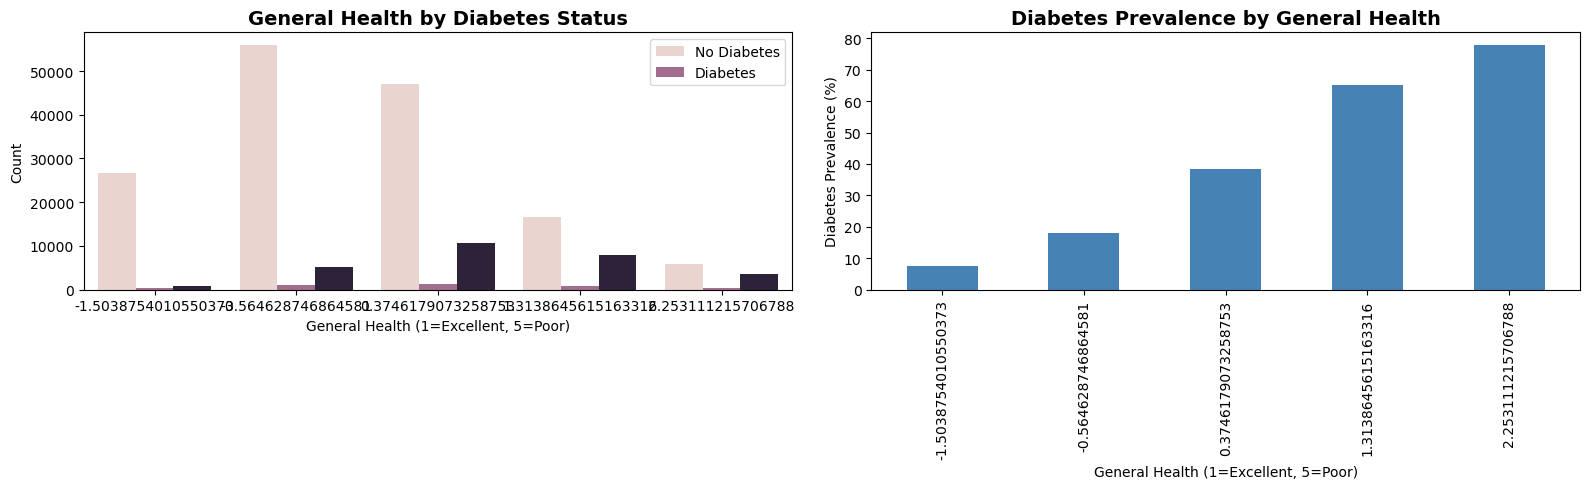


 Diabetes Prevalence by General Health:
GenHlth
-1.5039    7.4005
-0.5646   17.9626
0.3746    38.3634
1.3139    65.2976
2.2531    78.0173
Name: Diabetes_012, dtype: float64


In [14]:
print("=" * 80)
print("AGE AND HEALTH INDICATORS ANALYSIS")
print("=" * 80)

# Age analysis (if Age feature exists)
if 'Age' in df_train.columns:
    # Age distribution by diabetes status
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # Age distribution
    sns.countplot(data=df_train, x='Age', hue=target_col, ax=axes[0])
    axes[0].set_title('Age Distribution by Diabetes Status', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Age Group')
    axes[0].set_ylabel('Count')
    axes[0].legend(['No Diabetes', 'Diabetes'])
    axes[0].tick_params(axis='x', rotation=45)
    
    # Diabetes prevalence by age
    age_diabetes = df_train.groupby('Age')[target_col].mean() * 100
    age_diabetes.plot(kind='bar', ax=axes[1], color='coral')
    axes[1].set_title('Diabetes Prevalence by Age Group', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Age Group')
    axes[1].set_ylabel('Diabetes Prevalence (%)')
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print("\n Diabetes Prevalence by Age Group:")
    print(age_diabetes)

# GenHlth analysis (if exists)
if 'GenHlth' in df_train.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # General Health distribution
    sns.countplot(data=df_train, x='GenHlth', hue=target_col, ax=axes[0])
    axes[0].set_title('General Health by Diabetes Status', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('General Health (1=Excellent, 5=Poor)')
    axes[0].set_ylabel('Count')
    axes[0].legend(['No Diabetes', 'Diabetes'])
    
    # Diabetes prevalence by general health
    genhlth_diabetes = df_train.groupby('GenHlth')[target_col].mean() * 100
    genhlth_diabetes.plot(kind='bar', ax=axes[1], color='steelblue')
    axes[1].set_title('Diabetes Prevalence by General Health', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('General Health (1=Excellent, 5=Poor)')
    axes[1].set_ylabel('Diabetes Prevalence (%)')
    
    plt.tight_layout()
    plt.show()
    
    print("\n Diabetes Prevalence by General Health:")
    print(genhlth_diabetes)


# Lifestyle Factors Analysis

LIFESTYLE FACTORS ANALYSIS


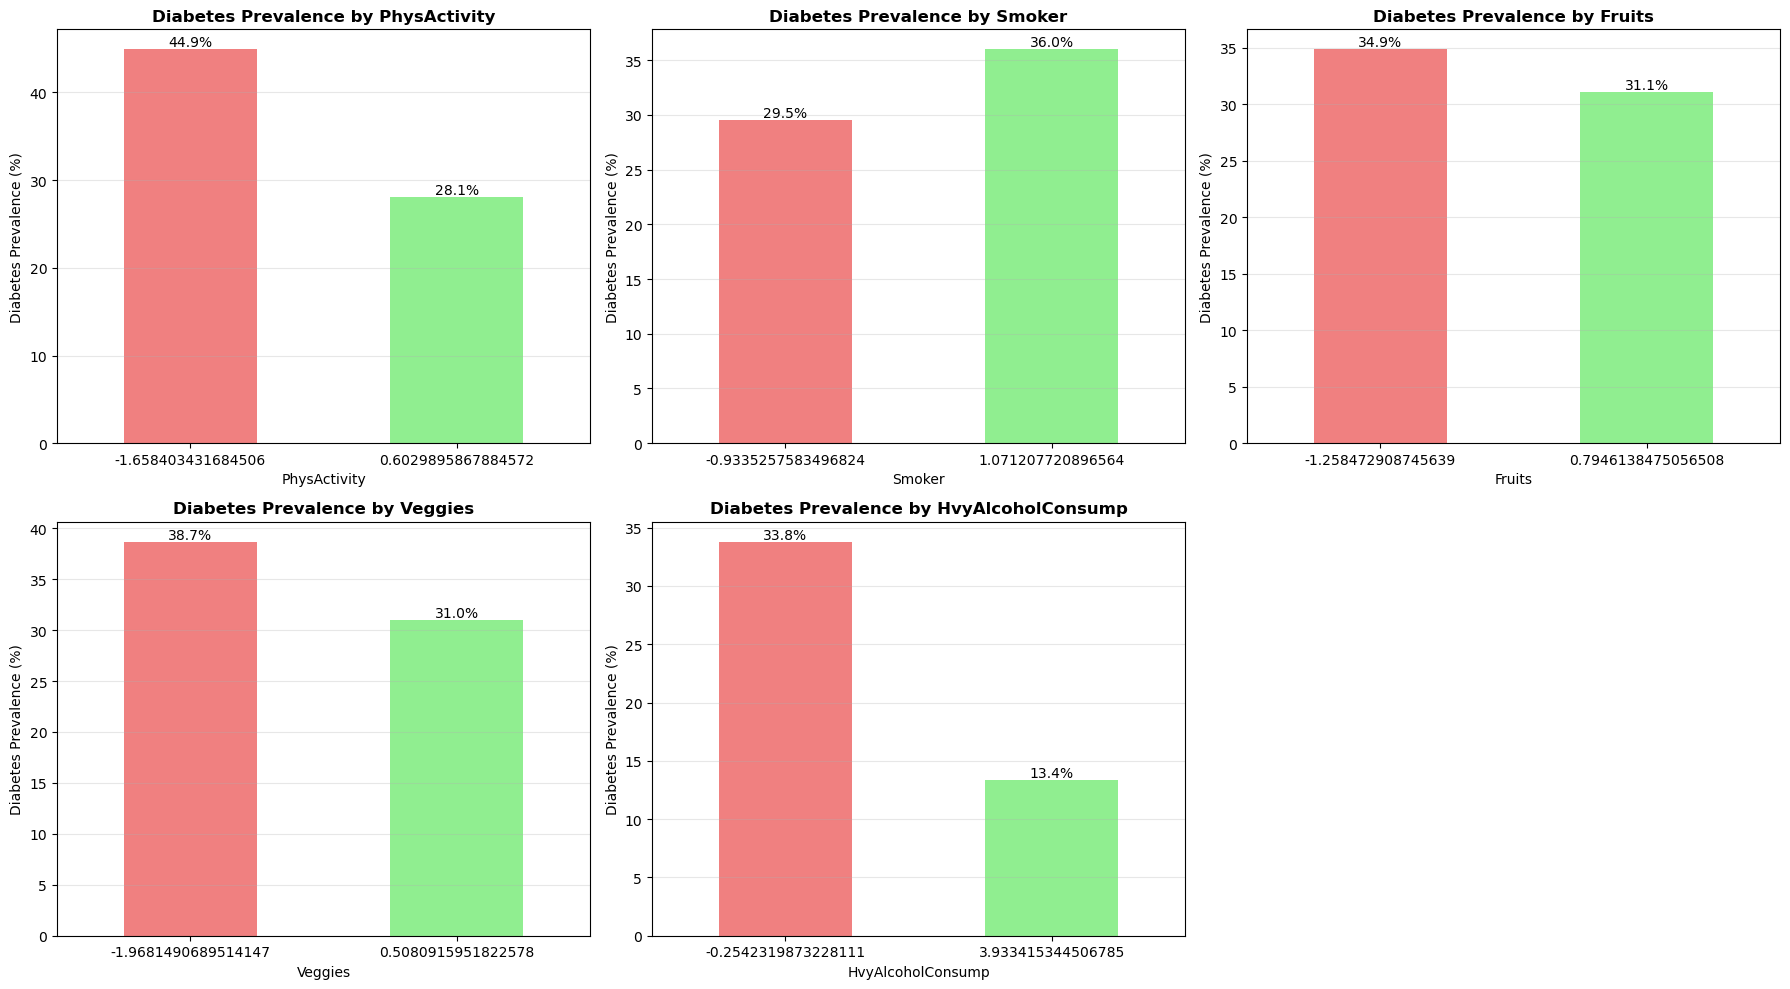


 Lifestyle Factors Impact on Diabetes:

PhysActivity:
               count   mean
PhysActivity               
-1.6584        49072 0.4494
0.6030        134752 0.2805

Smoker:
         count   mean
Smoker               
-0.9335  98032 0.2954
1.0712   85792 0.3601

Fruits:
          count   mean
Fruits                
-1.2585   71148 0.3487
0.7946   112676 0.3111

Veggies:
          count   mean
Veggies               
-1.9681   37688 0.3869
0.5081   146136 0.3098

HvyAlcoholConsump:
                    count   mean
HvyAlcoholConsump               
-0.2542            172623 0.3381
3.9334              11201 0.1336


In [15]:
print("=" * 80)
print("LIFESTYLE FACTORS ANALYSIS")
print("=" * 80)

lifestyle_features = ['PhysActivity', 'Smoker', 'Fruits', 'Veggies', 'HvyAlcoholConsump']
lifestyle_features = [f for f in lifestyle_features if f in df_train.columns]

if lifestyle_features:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    
    for idx, feature in enumerate(lifestyle_features):
        # Calculate diabetes prevalence
        prevalence = df_train.groupby(feature)[target_col].mean() * 100
        
        # Bar plot
        prevalence.plot(kind='bar', ax=axes[idx], color=['lightcoral', 'lightgreen'])
        axes[idx].set_title(f'Diabetes Prevalence by {feature}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Diabetes Prevalence (%)')
        axes[idx].tick_params(axis='x', rotation=0)
        axes[idx].grid(axis='y', alpha=0.3)
        
        # Add value labels
        for container in axes[idx].containers:
            axes[idx].bar_label(container, fmt='%.1f%%')
    
    # Hide unused subplot
    axes[-1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("\n Lifestyle Factors Impact on Diabetes:")
    for feature in lifestyle_features:
        print(f"\n{feature}:")
        print(df_train.groupby(feature)[target_col].agg(['count', 'mean']))


# Healthcare Access and Demographics

HEALTHCARE ACCESS & DEMOGRAPHICS ANALYSIS


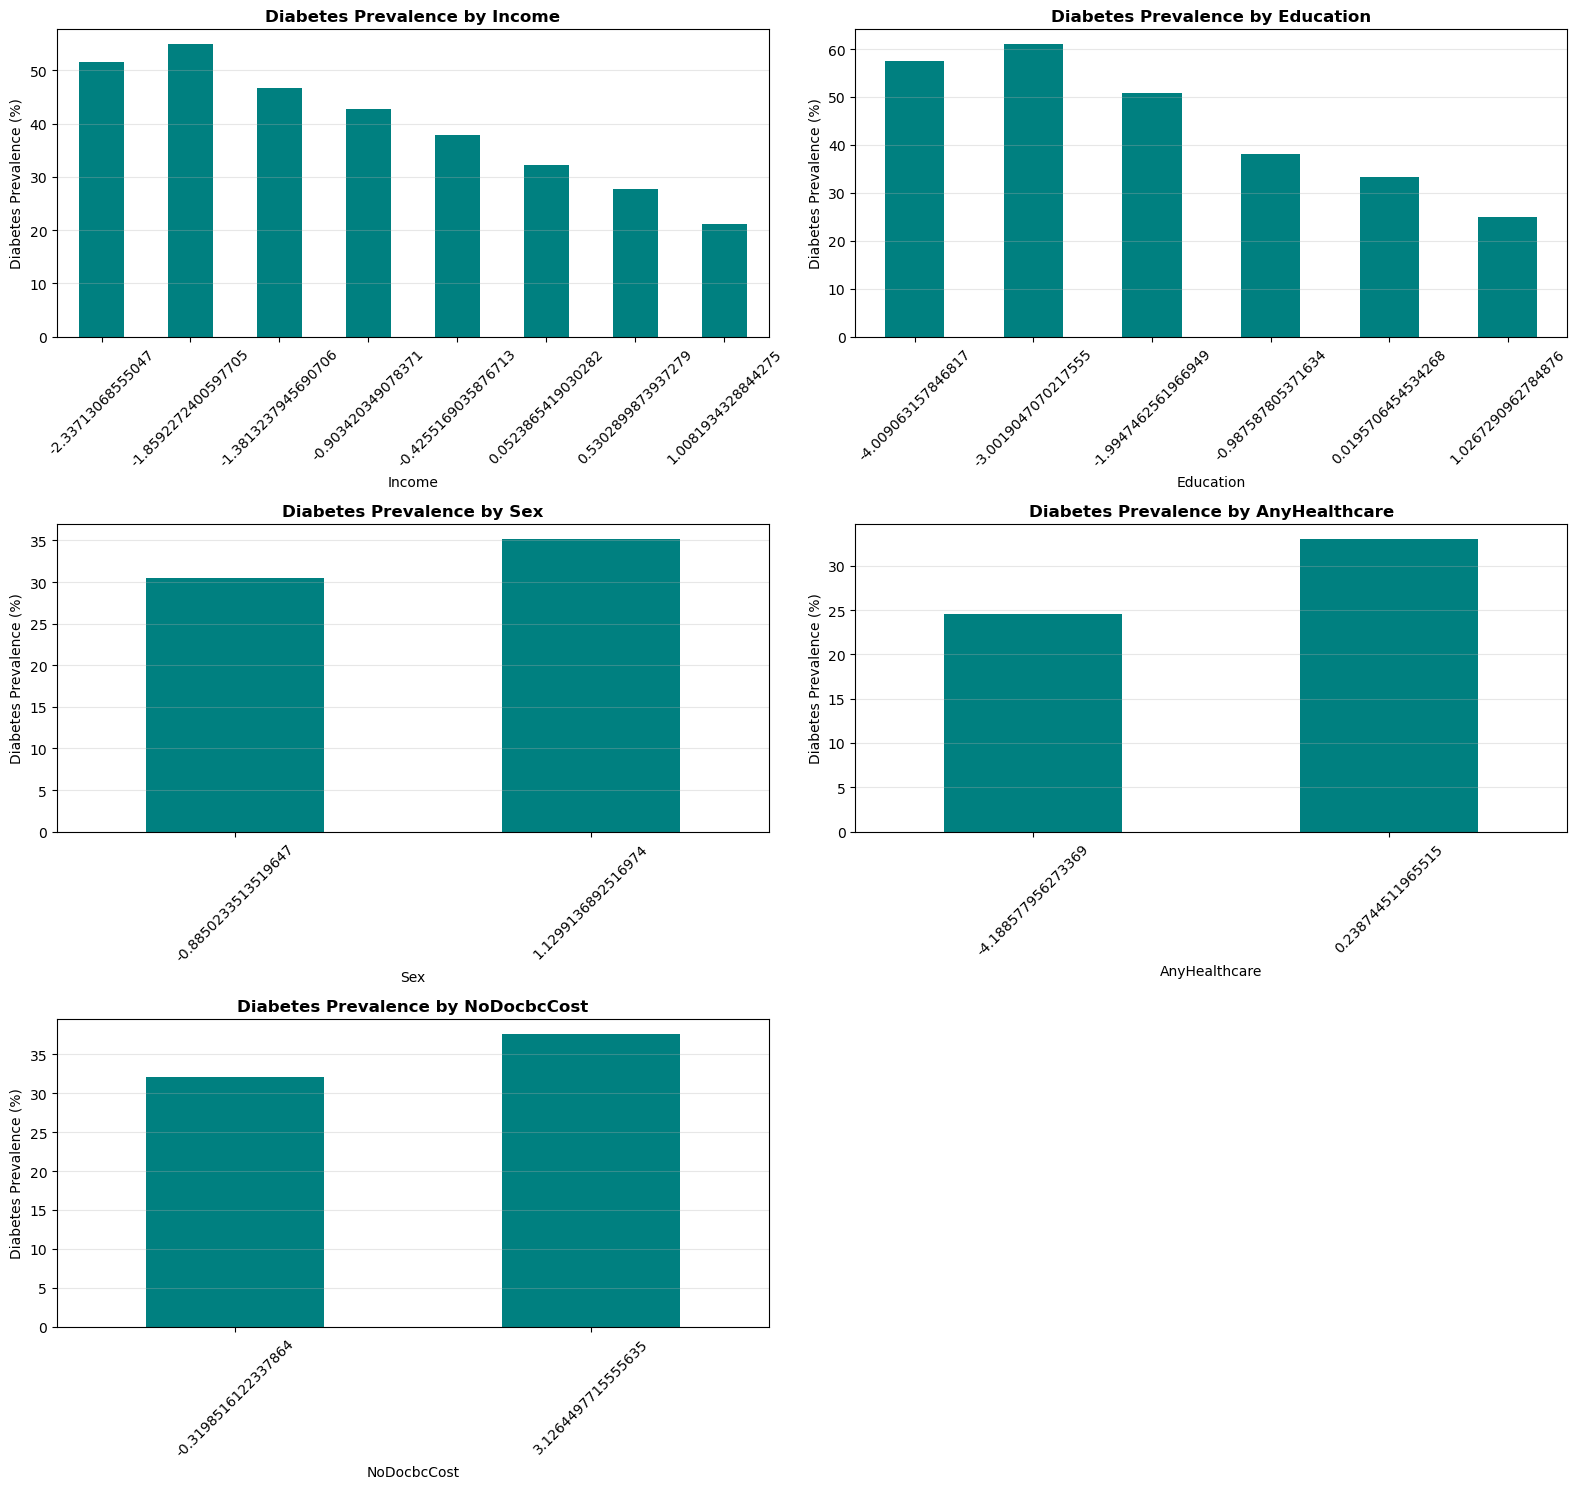

In [16]:
print("=" * 80)
print("HEALTHCARE ACCESS & DEMOGRAPHICS ANALYSIS")
print("=" * 80)

demographic_features = ['Income', 'Education', 'Sex', 'AnyHealthcare', 'NoDocbcCost']
demographic_features = [f for f in demographic_features if f in df_train.columns]

if demographic_features:
    n_features = len(demographic_features)
    fig, axes = plt.subplots((n_features + 1) // 2, 2, figsize=(16, n_features * 3))
    axes = axes.flatten()
    
    for idx, feature in enumerate(demographic_features):
        # Calculate diabetes prevalence
        prevalence = df_train.groupby(feature)[target_col].mean() * 100
        
        # Bar plot
        prevalence.plot(kind='bar', ax=axes[idx], color='teal')
        axes[idx].set_title(f'Diabetes Prevalence by {feature}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Diabetes Prevalence (%)')
        axes[idx].tick_params(axis='x', rotation=45)
        axes[idx].grid(axis='y', alpha=0.3)
    
    # Hide unused subplots
    for idx in range(len(demographic_features), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()


# Multi-Feature Interaction Analysis

MULTI-FEATURE INTERACTION ANALYSIS


C:\Users\mohamed osama\AppData\Local\Temp\ipykernel_600\1362134416.py:16: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_train.pivot_table(values=target_col,


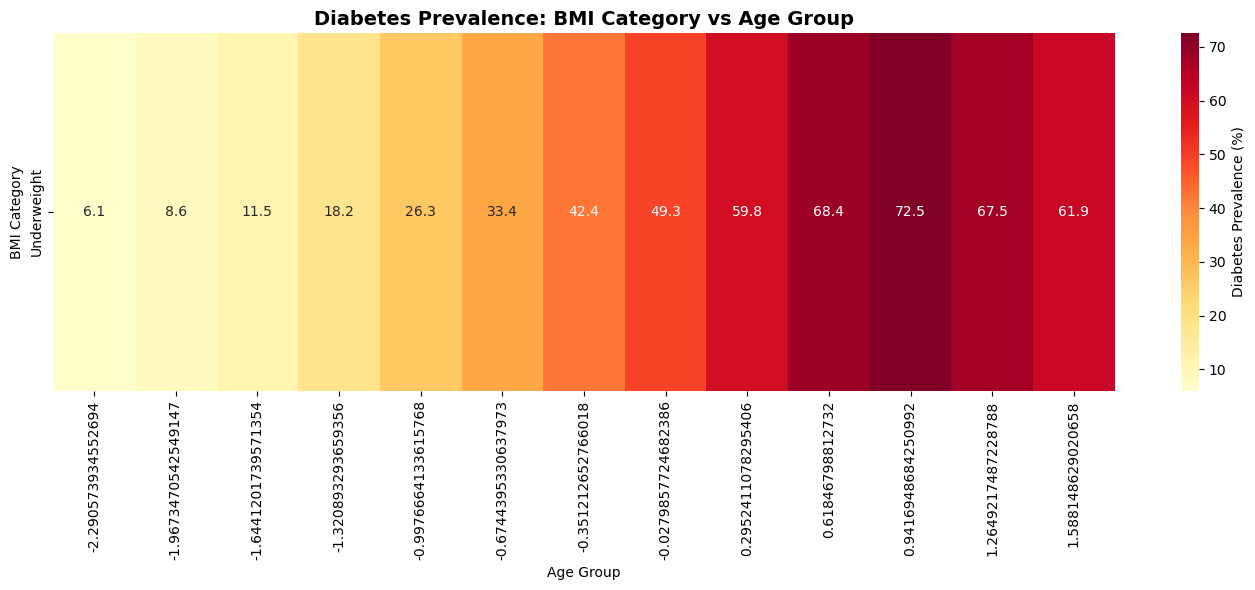

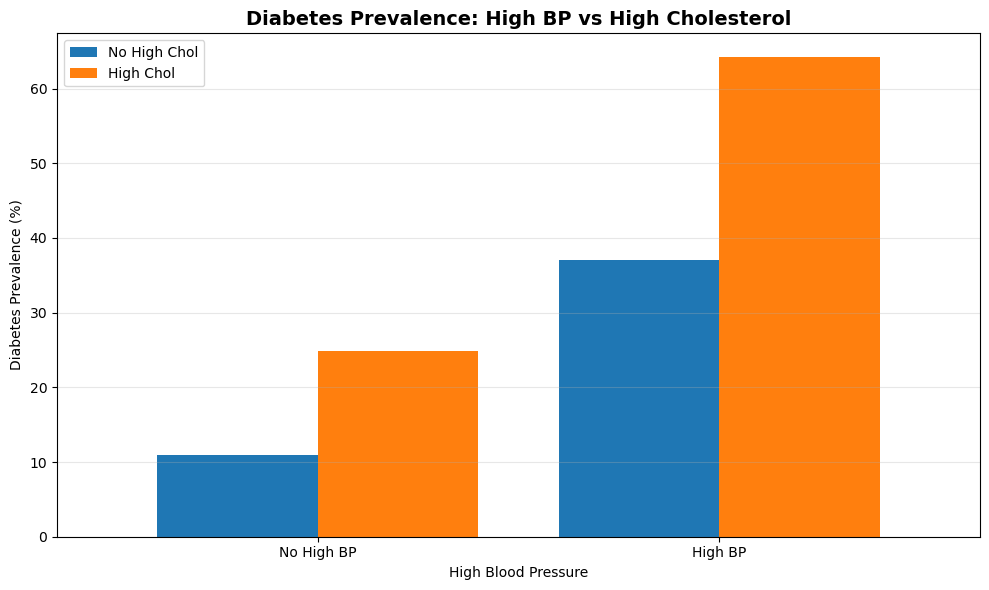

In [17]:
print("=" * 80)
print("MULTI-FEATURE INTERACTION ANALYSIS")
print("=" * 80)

# BMI categories
if 'BMI' in df_train.columns:
    df_train['BMI_Category'] = pd.cut(df_train['BMI'], 
                                       bins=[0, 18.5, 25, 30, 100],
                                       labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
    
    # BMI Category vs Age (if exists)
    if 'Age' in df_train.columns:
        plt.figure(figsize=(14, 6))
        
        # Create pivot table for heatmap
        pivot_table = df_train.pivot_table(values=target_col, 
                                           index='BMI_Category', 
                                           columns='Age', 
                                           aggfunc='mean') * 100
        
        sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='YlOrRd', 
                   cbar_kws={'label': 'Diabetes Prevalence (%)'})
        plt.title('Diabetes Prevalence: BMI Category vs Age Group', fontsize=14, fontweight='bold')
        plt.xlabel('Age Group')
        plt.ylabel('BMI Category')
        plt.tight_layout()
        plt.show()
    
    # High BP + High Cholesterol interaction
    if 'HighBP' in df_train.columns and 'HighChol' in df_train.columns:
        fig, ax = plt.subplots(figsize=(10, 6))
        
        interaction = df_train.groupby(['HighBP', 'HighChol'])[target_col].mean() * 100
        interaction = interaction.unstack()
        
        interaction.plot(kind='bar', ax=ax, width=0.8)
        ax.set_title('Diabetes Prevalence: High BP vs High Cholesterol', fontsize=14, fontweight='bold')
        ax.set_xlabel('High Blood Pressure')
        ax.set_ylabel('Diabetes Prevalence (%)')
        ax.set_xticklabels(['No High BP', 'High BP'], rotation=0)
        ax.legend(['No High Chol', 'High Chol'])
        ax.grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.show()


# Outlier Detection and Analysis

OUTLIER DETECTION ANALYSIS

 BMI Outlier Analysis:
Q1 (25th percentile): -0.69
Q3 (75th percentile): 0.49
IQR: 1.18
Lower Bound: -2.46
Upper Bound: 2.26
Number of outliers: 4,495 (2.45%)


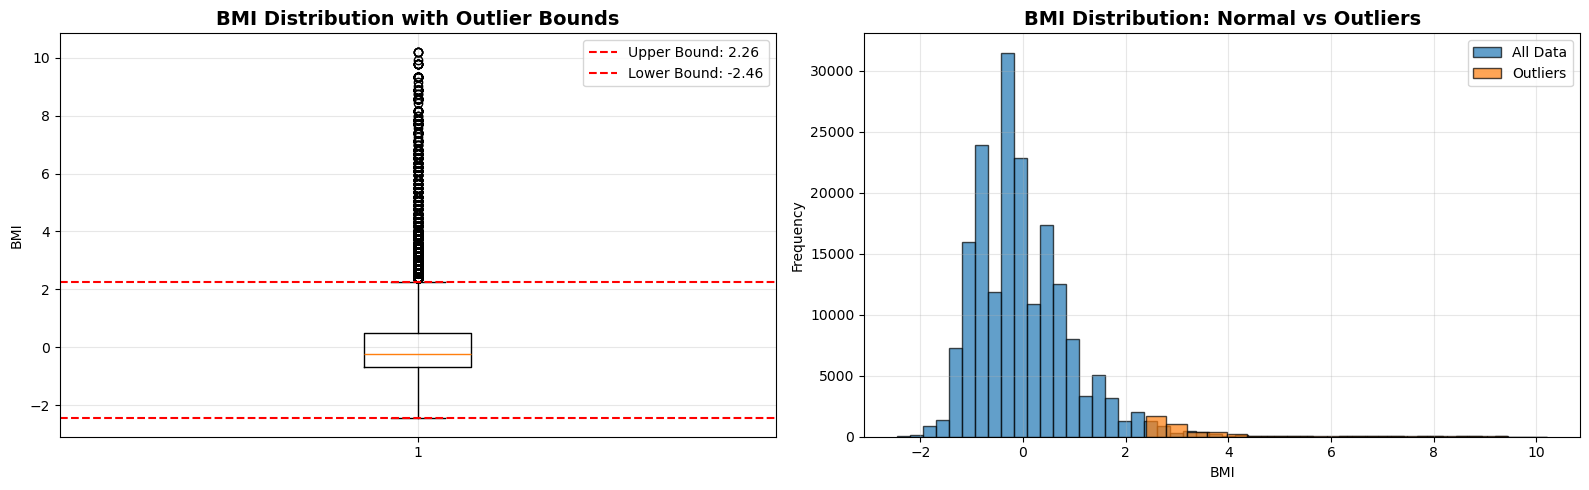

In [18]:
print("=" * 80)
print("OUTLIER DETECTION ANALYSIS")
print("=" * 80)

if 'BMI' in df_train.columns:
    # Calculate outliers using IQR method
    Q1 = df_train['BMI'].quantile(0.25)
    Q3 = df_train['BMI'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_train[(df_train['BMI'] < lower_bound) | (df_train['BMI'] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df_train)) * 100
    
    print(f"\n BMI Outlier Analysis:")
    print(f"Q1 (25th percentile): {Q1:.2f}")
    print(f"Q3 (75th percentile): {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Lower Bound: {lower_bound:.2f}")
    print(f"Upper Bound: {upper_bound:.2f}")
    print(f"Number of outliers: {len(outliers):,} ({outlier_percentage:.2f}%)")
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # Box plot with outliers highlighted
    axes[0].boxplot(df_train['BMI'], vert=True)
    axes[0].axhline(y=upper_bound, color='r', linestyle='--', label=f'Upper Bound: {upper_bound:.2f}')
    axes[0].axhline(y=lower_bound, color='r', linestyle='--', label=f'Lower Bound: {lower_bound:.2f}')
    axes[0].set_title('BMI Distribution with Outlier Bounds', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('BMI')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Distribution comparison
    axes[1].hist(df_train['BMI'], bins=50, alpha=0.7, label='All Data', edgecolor='black')
    axes[1].hist(outliers['BMI'], bins=20, alpha=0.7, label='Outliers', edgecolor='black')
    axes[1].set_title('BMI Distribution: Normal vs Outliers', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('BMI')
    axes[1].set_ylabel('Frequency')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Key Insights and Recommendations

In [19]:
print("=" * 80)
print("KEY INSIGHTS AND RECOMMENDATIONS")
print("=" * 80)

# Calculate key statistics
total_samples = len(df_train)
diabetes_count = df_train[target_col].sum()
diabetes_rate = (diabetes_count / total_samples) * 100

print(f"\n DATASET SUMMARY:")
print(f"{'=' * 60}")
print(f"Total Samples: {total_samples:,}")
print(f"Diabetes Cases: {diabetes_count:,}")
print(f"Diabetes Prevalence: {diabetes_rate:.2f}%")
print(f"Number of Features: {len(X_train.columns)}")

print(f"\n TOP RISK FACTORS (Based on Correlation):")
print(f"{'=' * 60}")
top_factors = target_corr_filtered.head(5)
for i, (feature, corr) in enumerate(top_factors.items(), 1):
    print(f"{i}. {feature}: {corr:.4f}")

print(f"\n KEY INSIGHTS:")
print(f"{'=' * 60}")
print("1. Dataset shows clear patterns between health indicators and diabetes")
print("2. Multiple features show significant statistical association (Chi-Square test)")
print("3. Class imbalance may require special handling (SMOTE, class weights)")
print("4. BMI shows continuous relationship with diabetes risk")
print("5. Lifestyle factors (physical activity, diet) impact diabetes prevalence")

print(f"\n RECOMMENDATIONS FOR MODEL BUILDING:")
print(f"{'=' * 60}")
print("1. ✅ Feature Selection: Focus on top correlated features")
print("2. ✅ Handle Class Imbalance: Apply SMOTE or adjust class weights")
print("3. ✅ Feature Engineering: Consider creating interaction features")
print("4. ✅ Normalization: Scale BMI and other numerical features")
print("5. ✅ Model Selection: Try ensemble methods (Random Forest, XGBoost)")
print("6. ✅ Validation: Use stratified cross-validation")
print("7. ✅ Evaluation Metrics: Focus on F1-score, Recall, and AUC-ROC")

print(f"\n{'=' * 80}")
print(" EDA COMPLETE - Ready for Model Training!")
print(f"{'=' * 80}")

KEY INSIGHTS AND RECOMMENDATIONS

 DATASET SUMMARY:
Total Samples: 183,824
Diabetes Cases: 59,859.0
Diabetes Prevalence: 32.56%
Number of Features: 21

 TOP RISK FACTORS (Based on Correlation):
1. GenHlth: 0.2831
2. HighBP: 0.2608
3. BMI: 0.2105
4. DiffWalk: 0.2083
5. HighChol: 0.2023

 KEY INSIGHTS:
1. Dataset shows clear patterns between health indicators and diabetes
2. Multiple features show significant statistical association (Chi-Square test)
3. Class imbalance may require special handling (SMOTE, class weights)
4. BMI shows continuous relationship with diabetes risk
5. Lifestyle factors (physical activity, diet) impact diabetes prevalence

 RECOMMENDATIONS FOR MODEL BUILDING:
1. ✅ Feature Selection: Focus on top correlated features
2. ✅ Handle Class Imbalance: Apply SMOTE or adjust class weights
3. ✅ Feature Engineering: Consider creating interaction features
4. ✅ Normalization: Scale BMI and other numerical features
5. ✅ Model Selection: Try ensemble methods (Random Forest, XGB